<a href="https://colab.research.google.com/github/Polydany0/Digital-Image-Processing/blob/main/LeNetArchitecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import os
import zipfile
import cv2
import numpy as np
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [26]:
# Скачивание архива
!wget https://github.com/GregVial/CoMNIST/raw/master/images/Cyrillic.zip

--2025-01-18 09:26:17--  https://github.com/GregVial/CoMNIST/raw/master/images/Cyrillic.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GregVial/CoMNIST/master/images/Cyrillic.zip [following]
--2025-01-18 09:26:18--  https://raw.githubusercontent.com/GregVial/CoMNIST/master/images/Cyrillic.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71657411 (68M) [application/zip]
Saving to: ‘Cyrillic.zip’

Cyrillic.zip        100%[===================>]  68.34M   255MB/s    in 0.3s    

2025-01-18 09:26:20 (255 MB/s) - ‘Cyrillic.zip’ saved [71657411/71657411]



In [55]:
# Распаковка архива
with zipfile.ZipFile('Cyrillic.zip', 'r') as zip_ref:
    zip_ref.extractall('Cyrillic')

In [56]:
# Удаление папки с буквой 'I'
image_dir = 'Cyrillic/Cyrillic'
if os.path.exists(os.path.join(image_dir, 'I')):
    shutil.rmtree(os.path.join(image_dir, 'I'))
    print("Папка 'I' удалена.")


Папка 'I' удалена.


In [61]:
# Функция для преобразования прозрачных пикселей в белые
def process_image(image_path, output_path):
    # Загрузка изображения с альфа-каналом
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Если изображение имеет 4 канала (RGBA), удаляем альфа-канал
    if image.shape[2] == 4:
        trans_mask = image[:, :, 3] == 0  # Маска для прозрачных пикселей
        image[trans_mask] = [255, 255, 255, 255]  # Заменяем прозрачные пиксели на белые
        new_img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)  # Преобразуем в RGB
    else:
        new_img = image  # Если альфа-канала нет, оставляем как есть

    # Сохранение обработанного изображения
    cv2.imwrite(output_path, new_img)

In [62]:
# Обработка всех изображений в папке
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # Проверяем, является ли элемент директорией
    if os.path.isdir(letter_dir):
        for image_name in os.listdir(letter_dir):
            image_path = os.path.join(letter_dir, image_name)

            # Проверяем, является ли элемент файлом и имеет ли расширение .png
            if os.path.isfile(image_path) and image_name.lower().endswith('.png'):
                # Создаем путь для сохранения обработанного изображения
                output_path = os.path.join(letter_dir, image_name)

                # Обработка изображения
                process_image(image_path, output_path)
                print(f"Обработано и сохранено: {output_path}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Обработано и сохранено: Cyrillic/Cyrillic/М/58c11316d151c.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bf1ed8cb8a3.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bfc46e91dfa.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58c5a7fad9f24.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58b13061ba25d.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bb4c96a0553.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58c29384d9231.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bf283f46e67.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58c1ca70e78ae.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58c1ac60e25b5.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bfcad29124a.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bf1145e0355.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bfa31c74741.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bda803d5d3e.png
Обработано и сохранено: Cyrillic/Cyrillic/М/58bc51dd39777.png
Об

Проверка... Проверка...

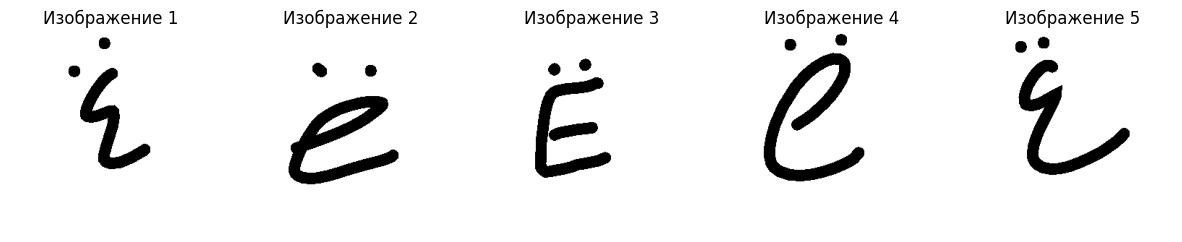

In [64]:
# Путь к папке с буквой "Ё"
letter_dir = os.path.join(image_dir, 'Ё')

# Проверяем, существует ли папка с буквой "Ё"
if os.path.exists(letter_dir):
    # Получаем список изображений в папке
    image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

    # Выводим первые 5 изображений
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(image_files))):  # Выводим не более 5 изображений
        image_path = os.path.join(letter_dir, image_files[i])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем в grayscale

        # Визуализация изображения
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Изображение {i + 1}")
        plt.axis('off')

    plt.show()
else:
    print("Папка с буквой 'Ё' не найдена.")

In [65]:
# Создаем словарь для хранения количества изображений
letter_counts = {}

# Проходим по всем папкам с буквами
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # Проверяем, является ли элемент директорией
    if os.path.isdir(letter_dir):
        # Считаем количество файлов с расширением .png
        image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]
        letter_counts[letter] = len(image_files)

# Выводим количество изображений для каждой буквы
for letter, count in letter_counts.items():
    print(f"Буква '{letter}': {count} изображений")

Буква 'У': 551 изображений
Буква 'Х': 486 изображений
Буква 'В': 487 изображений
Буква 'С': 513 изображений
Буква 'Ж': 462 изображений
Буква 'И': 447 изображений
Буква 'Е': 576 изображений
Буква 'Ю': 461 изображений
Буква 'Э': 458 изображений
Буква 'Р': 493 изображений
Буква 'Я': 438 изображений
Буква 'Н': 508 изображений
Буква 'О': 465 изображений
Буква 'Й': 466 изображений
Буква 'Ё': 344 изображений
Буква 'Г': 424 изображений
Буква 'Ф': 463 изображений
Буква 'Ш': 431 изображений
Буква 'П': 474 изображений
Буква 'Ъ': 459 изображений
Буква 'Д': 465 изображений
Буква 'М': 470 изображений
Буква 'Ы': 415 изображений
Буква 'Т': 456 изображений
Буква 'Щ': 446 изображений
Буква 'Ц': 448 изображений
Буква 'К': 459 изображений
Буква 'А': 469 изображений
Буква 'Б': 444 изображений
Буква 'Ч': 464 изображений
Буква 'Ь': 427 изображений
Буква 'Л': 433 изображений
Буква 'З': 431 изображений


In [66]:
# Находим минимальное количество изображений
min_value = min(letter_counts.values())
print(f"Минимальное количество изображений в классе: {min_value}")

Минимальное количество изображений в классе: 344


In [69]:
# Балансировка данных
for letter in letter_counts:
    letter_dir = os.path.join(image_dir, letter)

    # Получаем список всех изображений
    image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

    # Если изображений больше, чем min_value, удаляем лишние
    if len(image_files) > min_value:
        # Случайным образом выбираем изображения для удаления
        files_to_remove = random.sample(image_files, len(image_files) - min_value)

        # Удаляем выбранные изображения
        for file_name in files_to_remove:
            file_path = os.path.join(letter_dir, file_name)
            os.remove(file_path)
            print(f"Удалено: {file_path}")

        print(f"Буква '{letter}': оставлено {min_value} изображений")
    else:
        print(f"Буква '{letter}': уже сбалансирована ({len(image_files)} изображений)")

Удалено: Cyrillic/Cyrillic/У/58bff5b7ca22b.png
Удалено: Cyrillic/Cyrillic/У/58d415e3485fe.png
Удалено: Cyrillic/Cyrillic/У/58bf29c6d23ce.png
Удалено: Cyrillic/Cyrillic/У/58bf1cf33a52f.png
Удалено: Cyrillic/Cyrillic/У/5a6734f3a665f.png
Удалено: Cyrillic/Cyrillic/У/58c11c2f9d4fe.png
Удалено: Cyrillic/Cyrillic/У/58befae74ad2a.png
Удалено: Cyrillic/Cyrillic/У/58bfa968cd6f3.png
Удалено: Cyrillic/Cyrillic/У/58c7d4474ad0b.png
Удалено: Cyrillic/Cyrillic/У/58c38a5048301.png
Удалено: Cyrillic/Cyrillic/У/58be833ddde23.png
Удалено: Cyrillic/Cyrillic/У/58c3fab9e3e15.png
Удалено: Cyrillic/Cyrillic/У/58be9ed6ab11a.png
Удалено: Cyrillic/Cyrillic/У/58bee00cce5b4.png
Удалено: Cyrillic/Cyrillic/У/58c7686491325.png
Удалено: Cyrillic/Cyrillic/У/58c2ae483499b.png
Удалено: Cyrillic/Cyrillic/У/58bf195871305.png
Удалено: Cyrillic/Cyrillic/У/59fd484c7af11.png
Удалено: Cyrillic/Cyrillic/У/58bfa9128f5bb.png
Удалено: Cyrillic/Cyrillic/У/58bf0dde80c5e.png
Удалено: Cyrillic/Cyrillic/У/58bf19896b3f1.png
Удалено: Cyri

In [80]:
# Пути к папкам для тренировочных, валидационных и тестовых данных
train_dir = 'Cyrillic_train'
valid_dir = 'Cyrillic_valid'
test_dir = 'Cyrillic_test'

# Создаем папки, если они не существуют
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [81]:
# Проходим по всем папкам с буквами в image_dir
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # Проверяем, является ли элемент директорией
    if os.path.isdir(letter_dir):
        # Получаем список всех изображений
        image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

        # Создаем папки для текущей буквы в train, valid и test
        os.makedirs(os.path.join(train_dir, letter), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, letter), exist_ok=True)
        os.makedirs(os.path.join(test_dir, letter), exist_ok=True)

        # Индекс для отслеживания текущего изображения
        index = 0

        # Цикл для распределения изображений
        while index < len(image_files):
            # 2 изображения в Cyrillic_train
            for _ in range(2):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 изображение в Cyrillic_test
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(test_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

            # 2 изображения в Cyrillic_train
            for _ in range(2):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 изображение в Cyrillic_valid
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(valid_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

            # 3 изображения в Cyrillic_train
            for _ in range(3):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 изображение в Cyrillic_test
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(test_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

        print(f"Буква '{letter}': распределение завершено.")

Буква 'У': распределение завершено.
Буква 'Х': распределение завершено.
Буква 'В': распределение завершено.
Буква 'С': распределение завершено.
Буква 'Ж': распределение завершено.
Буква 'И': распределение завершено.
Буква 'Е': распределение завершено.
Буква 'Ю': распределение завершено.
Буква 'Э': распределение завершено.
Буква 'Р': распределение завершено.
Буква 'Я': распределение завершено.
Буква 'Н': распределение завершено.
Буква 'О': распределение завершено.
Буква 'Й': распределение завершено.
Буква 'Ё': распределение завершено.
Буква 'Г': распределение завершено.
Буква 'Ф': распределение завершено.
Буква 'Ш': распределение завершено.
Буква 'П': распределение завершено.
Буква 'Ъ': распределение завершено.
Буква 'Д': распределение завершено.
Буква 'М': распределение завершено.
Буква 'Ы': распределение завершено.
Буква 'Т': распределение завершено.
Буква 'Щ': распределение завершено.
Буква 'Ц': распределение завершено.
Буква 'К': распределение завершено.
Буква 'А': распределение зав

In [82]:
# Буква, для которой нужно вывести количество файлов
bykva = 'А'

# Пути к папкам с буквой "А" в каждой из трёх папок
train_bykva_dir = os.path.join(train_dir, bykva)
valid_bykva_dir = os.path.join(valid_dir, bykva)
test_bykva_dir = os.path.join(test_dir, bykva)

# Функция для подсчёта файлов в папке
def count_files(directory):
    if os.path.exists(directory) and os.path.isdir(directory):
        return len([f for f in os.listdir(directory) if f.lower().endswith('.png')])
    return 0

# Подсчёт файлов в каждой папке
train_count = count_files(train_bykva_dir)
valid_count = count_files(valid_bykva_dir)
test_count = count_files(test_bykva_dir)

# Вывод результатов
print(f"Количество файлов в папке '{bykva}':")
print(f"  Cyrillic_train: {train_count} изображений")
print(f"  Cyrillic_valid: {valid_count} изображений")
print(f"  Cyrillic_test: {test_count} изображений")

Количество файлов в папке 'А':
  Cyrillic_train: 241 изображений
  Cyrillic_valid: 34 изображений
  Cyrillic_test: 69 изображений


Теперь перейдем к тому с чего мы начали в LeNetArchitecture...

In [84]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [85]:
# Функция для загрузки данных из папки
def load_data(directory):
    images = []
    labels = []
    for letter in os.listdir(directory):
        letter_dir = os.path.join(directory, letter)
        if os.path.isdir(letter_dir):
            for image_name in os.listdir(letter_dir):
                image_path = os.path.join(letter_dir, image_name)
                if image_name.lower().endswith('.png'):
                    image = tf.keras.utils.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
                    image = tf.keras.utils.img_to_array(image)
                    images.append(image)
                    labels.append(letter)
    return np.array(images), np.array(labels)

In [86]:
# Загрузка тренировочных, валидационных и тестовых данных
x_train, y_train = load_data(train_dir)
x_valid, y_valid = load_data(valid_dir)
x_test, y_test = load_data(test_dir)

In [87]:
# Нормализация изображений
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# One Hot Encoding для меток
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

Блок обучения 🦾🦾🦾

In [108]:
# Очистка сессии Keras для сброса состояния
K.clear_session()

In [109]:
# Построение модели
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [111]:
# Компиляция модели
K.clear_session()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
history = model.fit(
    x_train, y_train,  # Тренировочные данные
    batch_size=32,    # Размер батча
    epochs=20,         # Количество эпох
    verbose=1,         # Уровень детализации вывода
    validation_data=(x_valid, y_valid)  # Валидационные данные
)

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1365 - loss: 3.1495 - val_accuracy: 0.5169 - val_loss: 1.7144
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5388 - loss: 1.5970 - val_accuracy: 0.6622 - val_loss: 1.1531
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6889 - loss: 1.0223 - val_accuracy: 0.7112 - val_loss: 0.9532
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7651 - loss: 0.7648 - val_accuracy: 0.7620 - val_loss: 0.8194
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8083 - loss: 0.6202 - val_accuracy: 0.7879 - val_loss: 0.7275
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8367 - loss: 0.5175 - val_accuracy: 0.8155 - val_loss: 0.6777
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8618 - loss: 0.4444 - val_accuracy: 0.8004 - val_loss: 0.6625
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8871 - loss: 0.3688 - val_accu

In [113]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Точность на тестовых данных: {test_acc:.4f}")

72/72 - 0s - 5ms/step - accuracy: 0.8533 - loss: 0.6893
Точность на тестовых данных: 0.8533
